# California Housing Price Prediction       


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data:

In [2]:
housingData = pd.read_csv('housing_train.csv')
housingData_test = pd.read_csv('housing_test.csv')

#### Print first few rows of train data:


In [3]:

print('Print first few rows of train data - ')
print()
print(housingData.head())

Print first few rows of train data - 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -116.46     33.82                 6.0       4863.0           920.0   
1    -117.04     34.00                21.0       4624.0           852.0   
2    -121.03     37.55                32.0        946.0           198.0   
3    -117.80     33.68                 8.0       2032.0           349.0   
4    -122.26     37.83                52.0       1656.0           420.0   

   population  households  median_income  median_house_value ocean_proximity  
0      3010.0       828.0         3.9508            104200.0          INLAND  
1      2174.0       812.0         3.5255            132100.0          INLAND  
2       624.0       173.0         1.9728             97900.0          INLAND  
3       862.0       340.0         6.9133            274100.0       <1H OCEAN  
4       718.0       382.0         2.6768            182300.0        NEAR BAY  


#### Print first few rows of test data:

In [4]:

print('Print first few rows of test data - ')
print()
print(housingData_test.head())

Print first few rows of test data - 

   Id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0    -122.64     38.24                40.0       1974.0           410.0   
1   1    -119.05     36.09                 9.0       3297.0           568.0   
2   2    -116.98     32.85                12.0       3570.0           713.0   
3   3    -118.42     34.20                27.0       3201.0           970.0   
4   4    -118.47     34.01                41.0       2704.0           557.0   

   population  households  median_income ocean_proximity  
0      1039.0       398.0         3.7917       <1H OCEAN  
1      1749.0       568.0         4.0217          INLAND  
2      3321.0       666.0         4.0882       <1H OCEAN  
3      3403.0       948.0         2.2377       <1H OCEAN  
4      1047.0       478.0         4.4211       <1H OCEAN  


In [5]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,104200.0,INLAND
1,-117.04,34.00,21.0,4624.0,852.0,2174.0,812.0,3.5255,132100.0,INLAND
2,-121.03,37.55,32.0,946.0,198.0,624.0,173.0,1.9728,97900.0,INLAND
3,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
4,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,182300.0,NEAR BAY


In [6]:
cols = housingData.columns.tolist()

In [7]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [8]:
cols1 = cols[-2]
cols2 = cols[-1]
cols[-1] = cols1
cols[-2] = cols2

In [9]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [10]:
housingData = housingData[cols]

In [23]:
print('Print first few rows of train data - ')
print()
print(housingData.head())

Print first few rows of train data - 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -116.46     33.82                 6.0       4863.0           920.0   
1    -117.04     34.00                21.0       4624.0           852.0   
2    -121.03     37.55                32.0        946.0           198.0   
3    -117.80     33.68                 8.0       2032.0           349.0   
4    -122.26     37.83                52.0       1656.0           420.0   

   population  households  median_income ocean_proximity  median_house_value  
0      3010.0       828.0         3.9508          INLAND            104200.0  
1      2174.0       812.0         3.5255          INLAND            132100.0  
2       624.0       173.0         1.9728          INLAND             97900.0  
3       862.0       340.0         6.9133       <1H OCEAN            274100.0  
4       718.0       382.0         2.6768        NEAR BAY            182300.0  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x009A6130>,
      dtype=object)

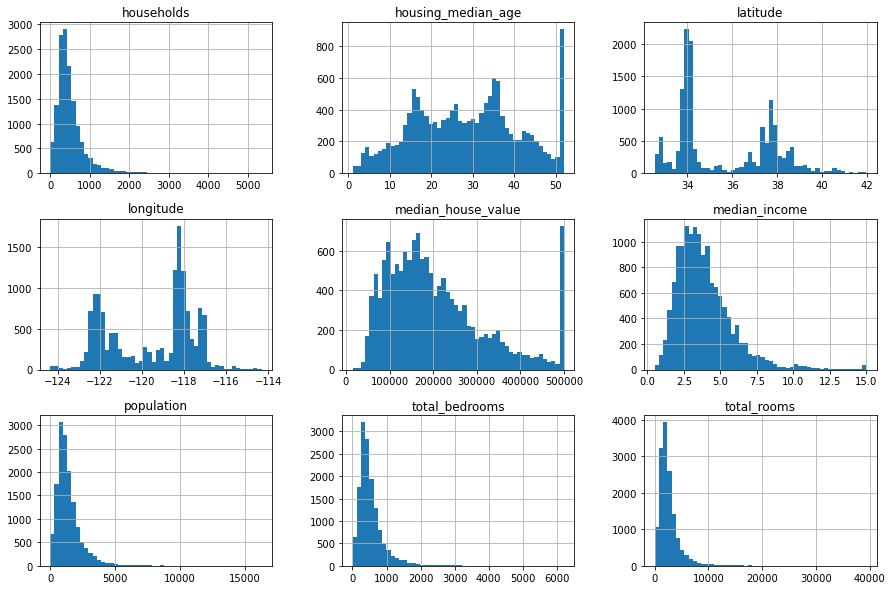

In [24]:
housingData.hist(bins=50,figsize=(15,10))

In [25]:

corr_matrix=housingData.corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688639
total_rooms           0.137104
housing_median_age    0.099591
households            0.066519
total_bedrooms        0.050817
population           -0.020781
longitude            -0.043860
latitude             -0.145084
Name: median_house_value, dtype: float64


Median Income is the best attribute to get median hosung price

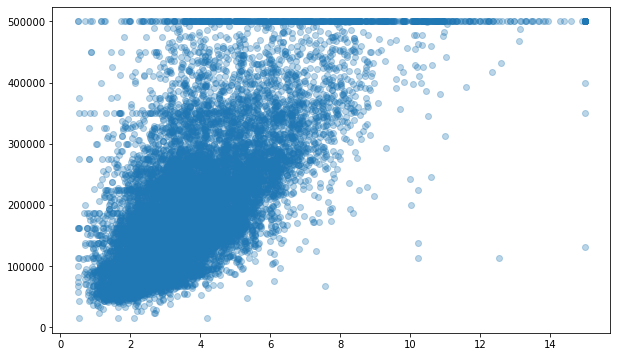

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y=housingData['median_house_value'],x=housingData['median_income'],alpha=0.3)

At 500k we can see a clear line can be seen at which the data is capped. These data may degrade the performance of  the model.

### Creating new features:

rooms per household, bedrooms per room, population per household

In [28]:
housingData1=housingData.copy()

In [29]:
housingData1['rooms_per_household']=housingData1['total_rooms']/housingData1['households']
housingData1['bedrooms_per_room']=housingData1['total_bedrooms']/housingData1['total_rooms']
housingData1['population_per_household']=housingData1['population']/housingData1['households']

In [30]:
housingData1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,INLAND,104200.0,5.873188,0.189184,3.635266


In [31]:
corr_matrix=housingData1.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688639
rooms_per_household         0.148217
total_rooms                 0.137104
housing_median_age          0.099591
households                  0.066519
total_bedrooms              0.050817
population_per_household   -0.018483
population                 -0.020781
longitude                  -0.043860
latitude                   -0.145084
bedrooms_per_room          -0.258461
Name: median_house_value, dtype: float64


It is clear that rooms_per_household and bedrooms_per_room have better correlation with median_house_value than total_rooms and total_bedrooms.

In [33]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [34]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

In [35]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [36]:
housingData1=RemoveOutliers().fit_transform(housingData1)

In [37]:
#data_labels=housingData1['median_house_value']
#housingData1=housingData1.drop('median_house_value',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C071040>,
      dtype=object)

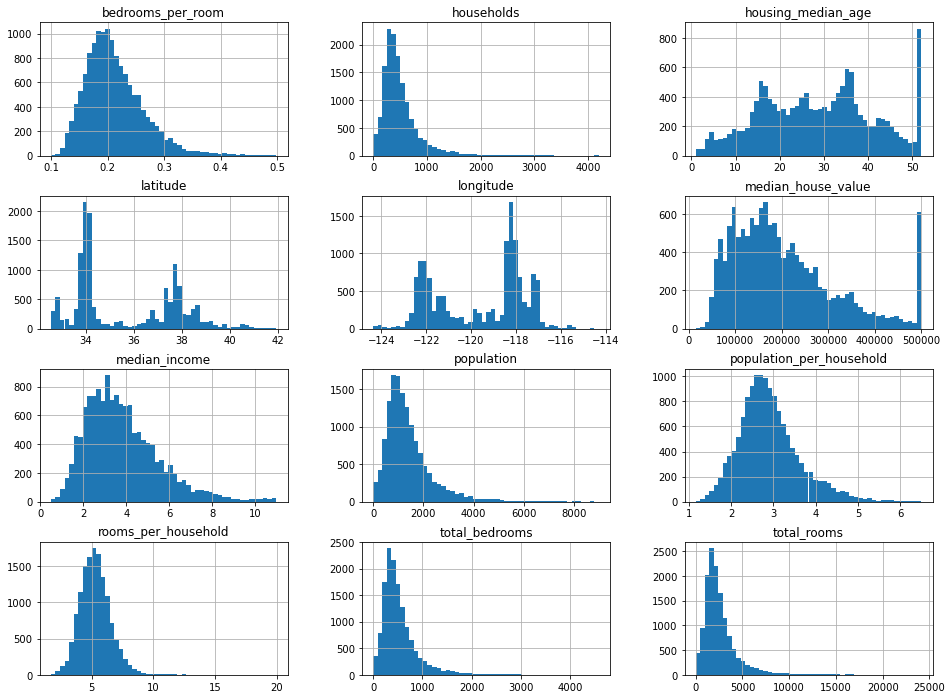

In [38]:
housingData1.hist(bins=50,figsize=(16,12))

In [39]:
cols = housingData1.columns.tolist()

In [40]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [41]:
cols1 = cols[-4]
cols2 = cols[-1]
cols[-1] = cols1
cols[-4] = cols2

In [42]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'population_per_household',
 'rooms_per_household',
 'bedrooms_per_room',
 'median_house_value']

In [43]:
housingData1 = housingData1[cols]

In [44]:
cols1 = cols[-5]
cols2 = cols[-2]
cols[-2] = cols1
cols[-5] = cols2

In [45]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_room',
 'population_per_household',
 'rooms_per_household',
 'ocean_proximity',
 'median_house_value']

In [46]:
housingData1 = housingData1[cols]

In [47]:
housingData1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,population_per_household,rooms_per_household,ocean_proximity,median_house_value
0,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,0.189184,3.635266,5.873188,INLAND,104200.0
1,-117.04,34.00,21.0,4624.0,852.0,2174.0,812.0,3.5255,0.184256,2.677340,5.694581,INLAND,132100.0
2,-121.03,37.55,32.0,946.0,198.0,624.0,173.0,1.9728,0.209302,3.606936,5.468208,INLAND,97900.0
3,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,0.171752,2.535294,5.976471,<1H OCEAN,274100.0
4,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,0.253623,1.879581,4.335079,NEAR BAY,182300.0


### Extract input and output data from the dataset:

In [48]:
X = housingData1.iloc[:, :-1].values
y = housingData1.iloc[:, [-1]].values

In [49]:
print(X)
print(y)

[[-116.46 33.82 6.0 ... 3.635265700483092 5.8731884057971016 'INLAND']
 [-117.04 34.0 21.0 ... 2.6773399014778323 5.694581280788177 'INLAND']
 [-121.03 37.55 32.0 ... 3.606936416184971 5.468208092485549 'INLAND']
 ...
 [-121.76 37.33 5.0 ... 3.4935437589670015 5.958393113342898 '<1H OCEAN']
 [-122.44 37.78 44.0 ... 1.7208588957055215 4.7392638036809815 'NEAR BAY']
 [-119.08 36.21 20.0 ... 3.5660919540229883 5.491379310344827 'INLAND']]
[[104200.]
 [132100.]
 [ 97900.]
 ...
 [286200.]
 [412500.]
 [ 59300.]]


### Fill the missing values with the mean of the respective column:

In [50]:
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer()
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)

In [51]:
print(y)
e = np.var(y)
d = np.mean(y)
print(d)
print(e)

[[104200.]
 [132100.]
 [ 97900.]
 ...
 [286200.]
 [412500.]
 [ 59300.]]
205340.2014861389
12808709375.16432


### Encode categorical variables: (categorical column -> numerical data)

In [52]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

### Standartize data:

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [54]:
print(y)

[[-0.89365755]
 [-0.64713791]
 [-0.94932327]
 ...
 [ 0.71446337]
 [ 1.8304286 ]
 [-1.29038628]]


In [55]:
from math import sqrt
tt = y*sqrt(e)+d
print(tt)

[[104200.]
 [132100.]
 [ 97900.]
 ...
 [286200.]
 [412500.]
 [ 59300.]]


### Linear Regression on training data:


In [56]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X, y)

LinearRegression()

### Regression lines of the median_house_value against each single feature:

In [57]:
X_train_longitude = X[: , [0]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_longitude, y)

LinearRegression()

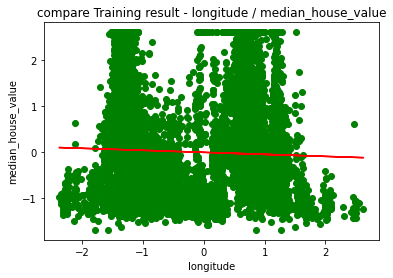

In [58]:
plt.scatter(X_train_longitude, y, color = 'green')
plt.plot (X_train_longitude, 
          linearRegression2.predict(X_train_longitude), color = 'red')
plt.title ('compare Training result - longitude / median_house_value')
plt.xlabel('longitude')
plt.ylabel('median_house_value')
plt.show()

In [59]:
X_train_latitude = X[: , [1]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_latitude, y)

LinearRegression()

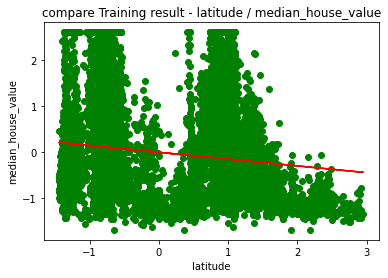

In [60]:
plt.scatter(X_train_latitude, y, color = 'green')
plt.plot (X_train_latitude, 
          linearRegression2.predict(X_train_latitude), color = 'red')
plt.title ('compare Training result - latitude / median_house_value')
plt.xlabel('latitude')
plt.ylabel('median_house_value')
plt.show()

In [61]:
X_train_housing_median_age = X[: , [2]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_housing_median_age, y)

LinearRegression()

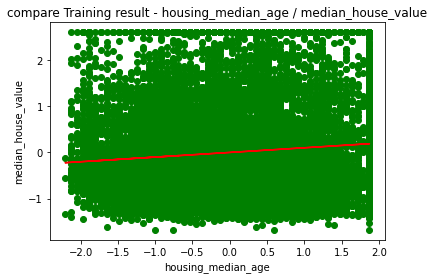

In [62]:
plt.scatter(X_train_housing_median_age, y, color = 'green')
plt.plot (X_train_housing_median_age, 
          linearRegression2.predict(X_train_housing_median_age), color = 'red')
plt.title ('compare Training result - housing_median_age / median_house_value')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.show()

In [63]:
X_train_total_rooms = X[: , [3]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_total_rooms, y)

LinearRegression()

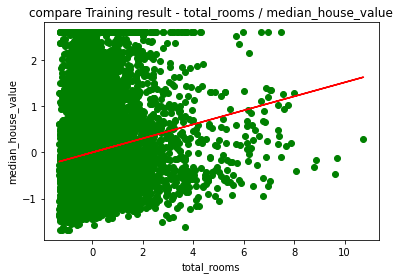

In [64]:
plt.scatter(X_train_total_rooms, y, color = 'green')
plt.plot (X_train_total_rooms, 
          linearRegression2.predict(X_train_total_rooms), color = 'red')
plt.title ('compare Training result - total_rooms / median_house_value')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

In [65]:
X_train_total_bedrooms = X[: , [4]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_total_bedrooms, y)

LinearRegression()

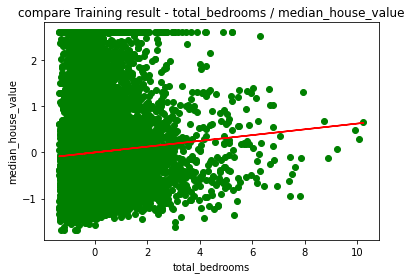

In [66]:
plt.scatter(X_train_total_bedrooms, y, color = 'green')
plt.plot (X_train_total_bedrooms, 
          linearRegression2.predict(X_train_total_bedrooms), color = 'red')
plt.title ('compare Training result - total_bedrooms / median_house_value')
plt.xlabel('total_bedrooms')
plt.ylabel('median_house_value')
plt.show()

In [67]:
X_train_population = X[: , [5]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_population, y)

LinearRegression()

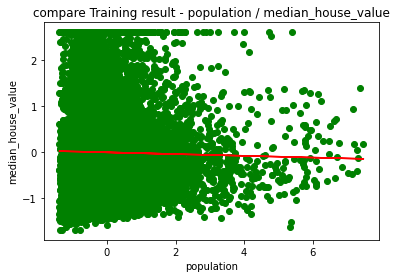

In [68]:
plt.scatter(X_train_population, y, color = 'green')
plt.plot (X_train_population, 
          linearRegression2.predict(X_train_population), color = 'red')
plt.title ('compare Training result - population / median_house_value')
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.show()

In [69]:
X_train_households = X[: , [6]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_households, y)

LinearRegression()

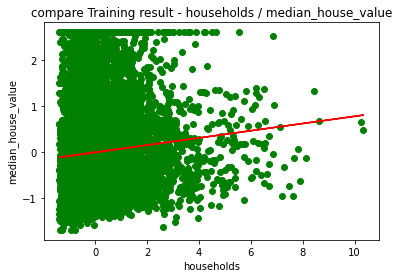

In [70]:
plt.scatter(X_train_households, y, color = 'green')
plt.plot (X_train_households, 
          linearRegression2.predict(X_train_households), color = 'red')
plt.title ('compare Training result - households / median_house_value')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.show()

In [71]:
X_train_median_income = X[: , [7]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y)

LinearRegression()

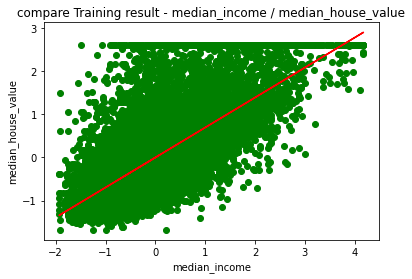

In [72]:
plt.scatter(X_train_median_income, y, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [73]:
X_train_bedrooms_per_room = X[: , [8]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_bedrooms_per_room, y)

LinearRegression()

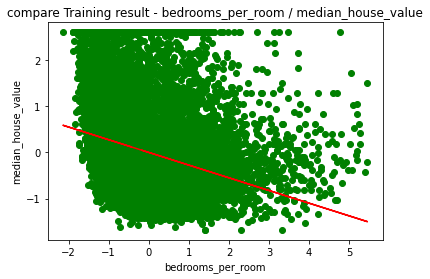

In [74]:
plt.scatter(X_train_bedrooms_per_room, y, color = 'green')
plt.plot (X_train_bedrooms_per_room, 
          linearRegression2.predict(X_train_bedrooms_per_room), color = 'red')
plt.title ('compare Training result - bedrooms_per_room / median_house_value')
plt.xlabel('bedrooms_per_room')
plt.ylabel('median_house_value')
plt.show()

In [75]:
X_train_population_per_household = X[: , [9]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_population_per_household, y)

LinearRegression()

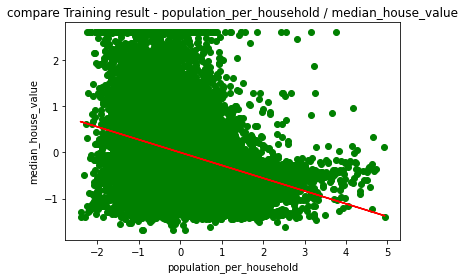

In [76]:
plt.scatter(X_train_population_per_household, y, color = 'green')
plt.plot (X_train_population_per_household, 
          linearRegression2.predict(X_train_population_per_household), color = 'red')
plt.title ('compare Training result - population_per_household / median_house_value')
plt.xlabel('population_per_household')
plt.ylabel('median_house_value')
plt.show()

In [77]:
X_train_rooms_per_household = X[: , [10]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_rooms_per_household, y)

LinearRegression()

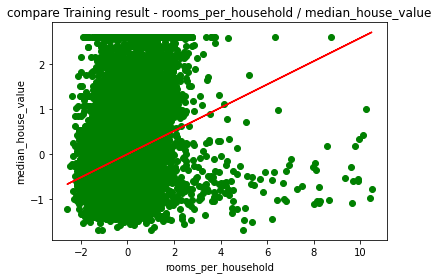

In [78]:
plt.scatter(X_train_rooms_per_household, y, color = 'green')
plt.plot (X_train_rooms_per_household, 
          linearRegression2.predict(X_train_rooms_per_household), color = 'red')
plt.title ('compare Training result - rooms_per_household / median_house_value')
plt.xlabel('rooms_per_household')
plt.ylabel('median_house_value')
plt.show()

In [79]:
X_train_ocean_proximity = X[: , [11]]
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_ocean_proximity, y)

LinearRegression()

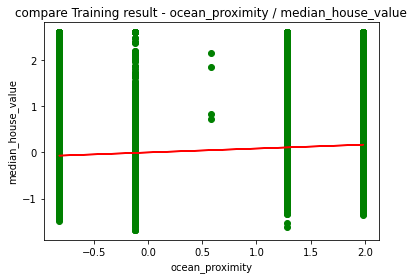

In [80]:
plt.scatter(X_train_ocean_proximity, y, color = 'green')
plt.plot (X_train_ocean_proximity, 
          linearRegression2.predict(X_train_ocean_proximity), color = 'red')
plt.title ('compare Training result - ocean_proximity / median_house_value')
plt.xlabel('ocean_proximity')
plt.ylabel('median_house_value')
plt.show()

In [81]:
print(y)

[[-0.89365755]
 [-0.64713791]
 [-0.94932327]
 ...
 [ 0.71446337]
 [ 1.8304286 ]
 [-1.29038628]]


### Ridge Regression on training data:

In [82]:
# импорт библиотек
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# генерируем данные для X и y
#X, y = make_regression(n_samples=10000, noise=100, random_state=0)

# разделение данных на train и test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3)

ridge_regression = Ridge(alpha=0.1)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(train_X, train_y)

# предсказание результата
print(ridge_regression.predict(test_X))

# вывод точности предсказания
print(ridge_regression.score(test_X, test_y))

[[ 0.56147093]
 [ 0.00661253]
 [ 0.26501954]
 ...
 [-0.86680304]
 [ 0.69808399]
 [ 0.80004545]]
0.6714315850272592


### Lasso Regression on training data:

In [83]:
# импорт библиотек
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# генерируем данные для X и y
# X, y = make_regression(n_samples=10000, noise=100, random_state=0)

# разделение данных на train и test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3)

lasso_regression = Lasso(alpha=0.1) # alpha — величина регуляризации

# обучение
lasso_regression.fit(train_X, train_y)

# предсказание результата
print(lasso_regression.predict(test_X))

# вывод точности предсказания
print(lasso_regression.score(test_X, test_y))

[ 0.27313085  0.1026716   0.23939674 ... -1.01018394  0.40162866
  0.71118526]
0.5424319231245369


### Bayesian Regression on training data:

In [84]:
# импорт библиотек
from sklearn.datasets import make_regression
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# генерируем данные для X и y
# X, y = make_regression(n_samples=10000, noise=100, random_state=0)

# разделение данных на train и test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3)

bayesian_regression = BayesianRidge()

# обучение
bayesian_regression.fit(train_X, train_y)

# предсказание результата
print(bayesian_regression.predict(test_X))

# вывод точности предсказания
print(bayesian_regression.score(test_X, test_y))

[ 0.56179335  0.00598468  0.26517401 ... -0.86714108  0.69764041
  0.7989648 ]
0.6714261231375801


C:\Users\svetl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [85]:
import numpy as np
import pandas as pd

# Creating a 2 dimensional numpy array
#>>> data = np.array([[5.8, 2.8], [6.0, 2.2]])
#>>> print(data)
#>>> data
#array([[5.8, 2.8],
#       [6. , 2.2]])

# Creating pandas dataframe from numpy array
#dataset = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1]})
X_frame = pd.DataFrame(X)
print(X_frame)


              0         1         2         3         4         5         6  \
0      1.553199 -0.848779 -1.808685  1.117259  0.966695  1.569473  0.912695   
1      1.264528 -0.764619 -0.607640  0.997769  0.794693  0.743903  0.868032   
2     -0.721329  0.895202  0.273127 -0.841070 -0.859565 -0.786760 -0.915668   
3      0.886270 -0.914237 -1.648546 -0.298118 -0.477618 -0.551729 -0.449506   
4     -1.333511  1.026117  1.874522 -0.486101 -0.298028 -0.693933 -0.332267   
...         ...       ...       ...       ...       ...       ...       ...   
13991  1.065445 -0.717864  1.153894 -0.507099 -0.348617 -0.488528 -0.424383   
13992  1.164987 -1.059179 -1.168128  1.029267  0.645456  1.002634  0.775916   
13993 -1.084656  0.792339 -1.888755  0.762290  0.458277  1.001647  0.547022   
13994 -1.423098  1.002739  1.233964 -0.541596 -0.515560 -0.848974 -0.488585   
13995  0.249203  0.268678 -0.687709 -0.358612 -0.376441 -0.177457 -0.427174   

              7         8         9        10      

In [86]:
y_frame = pd.DataFrame(y)
print(y_frame)

              0
0     -0.893658
1     -0.647138
2     -0.949323
3      0.607550
4     -0.203579
...         ...
13991 -0.974064
13992 -0.215949
13993  0.714463
13994  1.830429
13995 -1.290386

[13996 rows x 1 columns]


In [87]:
y1 = y = y_frame.iloc[:,-1]

In [88]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
acc_score = []
 
for train_index , test_index in kf.split(X_frame):
    X_train , X_test = X_frame.iloc[train_index,:],X_frame.iloc[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = mean_squared_error(y_test, pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.31286489957494934, 0.3285327260926765, 0.31658414086995046, 0.3631643502415836, 0.31678079181597524, 0.2913238713937519, 0.3345728348120631, 0.3051300920110915, 0.3222340447400964, 0.3144654546245875]
Avg accuracy : 0.3205653206176725


In [89]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = Ridge(alpha=0.1)
acc_score = []
 
for train_index , test_index in kf.split(X_frame):
    X_train , X_test = X_frame.iloc[train_index,:],X_frame.iloc[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = mean_squared_error(y_test, pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.312864827331705, 0.3285331573904858, 0.3165850739366694, 0.3631636767599264, 0.3167809971281622, 0.29132489124481037, 0.3345731747001715, 0.305130297137638, 0.3222334662676041, 0.3144626967778683]
Avg accuracy : 0.32056522586750413


In [90]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = Lasso(alpha=0.1)
acc_score = []
 
for train_index , test_index in kf.split(X_frame):
    X_train , X_test = X_frame.iloc[train_index,:],X_frame.iloc[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = mean_squared_error(y_test, pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.4554102911010742, 0.46684682650278175, 0.45265714075345254, 0.4927443111588366, 0.4477078874744263, 0.4089401092707216, 0.46715397809226034, 0.4357671072893791, 0.44173807103634694, 0.43297321960336277]
Avg accuracy : 0.4501938942282641


In [91]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = BayesianRidge()
acc_score = []
 
for train_index , test_index in kf.split(X_frame):
    X_train , X_test = X_frame.iloc[train_index,:],X_frame.iloc[test_index,:]
    y_train , y_test = y1[train_index] , y1[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = mean_squared_error(y_test, pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.31286410633104467, 0.3285433981417207, 0.3166057492298028, 0.3631503204679579, 0.3167865548721828, 0.2913474540992859, 0.33458114824773516, 0.305135389870361, 0.32222169893319513, 0.3144053486757734]
Avg accuracy : 0.32056411688690595


In [92]:
housingData1_test=housingData_test.copy()

In [93]:
housingData1_test['rooms_per_household']=housingData1_test['total_rooms']/housingData1_test['households']
housingData1_test['bedrooms_per_room']=housingData1_test['total_bedrooms']/housingData1_test['total_rooms']
housingData1_test['population_per_household']=housingData1_test['population']/housingData1_test['households']

In [94]:
cols = housingData1_test.columns.tolist()

In [95]:
cols

['Id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [96]:
cols1 = cols[-4]
cols2 = cols[-1]
cols[-1] = cols1
cols[-4] = cols2
cols

['Id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'population_per_household',
 'rooms_per_household',
 'bedrooms_per_room',
 'ocean_proximity']

In [97]:
housingData1_test = housingData1_test[cols]

In [98]:
housingData1_test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,population_per_household,rooms_per_household,bedrooms_per_room,ocean_proximity
0,0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,2.610553,4.959799,0.207700,<1H OCEAN
1,1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,3.079225,5.804577,0.172278,INLAND
2,2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,4.986486,5.360360,0.199720,<1H OCEAN
3,3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,3.589662,3.376582,0.303030,<1H OCEAN
4,4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,2.190377,5.656904,0.205991,<1H OCEAN


In [99]:
X_test = housingData1_test.iloc[:, 1:].values

In [100]:
print(X_test)

[[-122.64 38.24 40.0 ... 4.959798994974874 0.2077001013171226 '<1H OCEAN']
 [-119.05 36.09 9.0 ... 5.804577464788732 0.17227782832878374 'INLAND']
 [-116.98 32.85 12.0 ... 5.36036036036036 0.19971988795518208 '<1H OCEAN']
 ...
 [-117.88 33.7 17.0 ... 3.825242718446602 0.30144474814525574 '<1H OCEAN']
 [-118.37 34.07 52.0 ... 5.736979166666667 0.19836586472991374
  '<1H OCEAN']
 [-118.49 34.27 33.0 ... 6.009861932938856 0.17295700689202495
  '<1H OCEAN']]


In [101]:
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer()
X_test[:, :-1] = missingValueImputer.fit_transform(X_test[:, :-1])

In [102]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X_test[:, -1] = X_labelencoder.fit_transform(X_test[:, -1])

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)



In [104]:
print(X_test)

[[-1.54299645  1.22274802  0.88314284 ... -0.21211567 -0.08778427
  -0.82340127]
 [ 0.25258409  0.21545362 -1.5664061  ...  0.17113249 -0.70626265
  -0.11389658]
 [ 1.28791882 -1.30251562 -1.32935298 ... -0.03039418 -0.22712004
  -0.82340127]
 ...
 [ 0.83777328 -0.90428295 -0.93426444 ... -0.72682647  1.5490118
  -0.82340127]
 [ 0.59269405 -0.73093461  1.83135533 ...  0.14046537 -0.25076149
  -0.82340127]
 [ 0.53267464 -0.6372328   0.33001889 ...  0.26426329 -0.69440409
  -0.82340127]]


In [105]:
print(X)


[[ 1.55319948 -0.84877939 -1.80868543 ...  1.00023823  0.39102798
  -0.11880717]
 [ 1.26452846 -0.76461945 -0.60763968 ... -0.31740712  0.26296956
  -0.11880717]
 [-0.72132904  0.89520151  0.27312721 ...  0.96127075  0.10066365
  -0.11880717]
 ...
 [-1.08465636  0.79233937 -1.88875514 ...  0.80529697  0.45211838
  -0.82071729]
 [-1.42309824  1.00273921  1.23396381 ... -1.63306512 -0.42197761
   1.28501309]
 [ 0.24920282  0.26867754 -0.68770939 ...  0.90508841  0.11727704
  -0.11880717]]


In [106]:
print(y)

0       -0.893658
1       -0.647138
2       -0.949323
3        0.607550
4       -0.203579
           ...   
13991   -0.974064
13992   -0.215949
13993    0.714463
13994    1.830429
13995   -1.290386
Name: 0, Length: 13996, dtype: float64


In [107]:
# импорт библиотек
from sklearn.datasets import make_regression
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# генерируем данные для X и y
# X, y = make_regression(n_samples=10000, noise=100, random_state=0)

# разделение данных на train и test
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3)

bayesian_regression = BayesianRidge()

# обучение
bayesian_regression.fit(X, y)

# предсказание результата
pred = bayesian_regression.predict(X_test)
print(pred)

# вывод точности предсказания
#print(bayesian_regression.score(test_X, test_y))

[ 0.28665904 -0.58896465 -0.07212605 ...  0.281534    0.48070266
  0.31136035]


In [108]:
pred_frame = pd.DataFrame(pred)

In [109]:
print(pred)
tt = pred*sqrt(e)+d
print(tt)

[ 0.28665904 -0.58896465 -0.07212605 ...  0.281534    0.48070266
  0.31136035]
[237783.00142312 138683.79186909 197177.29446538 ... 237202.97155758
 259743.99849497 240578.58651234]


In [ ]:
tt_frame = pd.DataFrame(tt)